<div id="header"><p style="color:#2ea44f; text-align:center; font-weight:bold; font-family:verdana; font-size:25px;">Exploring quantum circuits as activation function within cryptography field</p></div>

[licenseBDG]: https://img.shields.io/badge/License-CC-orange?style=plastic
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[mywebsiteBDG]:https://img.shields.io/badge/website-jaorduz.github.io-0abeeb?style=plastic
[mywebsite]: https://jaorduz.github.io/

[mygithubBDG-jaorduz]: https://img.shields.io/badge/jaorduz-repos-blue?logo=github&label=jaorduz&style=plastic
[mygithub-jaorduz]: https://github.com/jaorduz/

[mygithubBDG-jaorduc]: https://img.shields.io/badge/jaorduc-repos-blue?logo=github&label=jaorduc&style=plastic 
[mygithub-jaorduc]: https://github.com/jaorduc/

[myXprofileBDG]: https://img.shields.io/static/v1?label=Follow&message=jaorduc&color=2ea44f&style=plastic&logo=X&logoColor=black
[myXprofile]:https://twitter.com/jaorduc


[![website - jaorduz.github.io][mywebsiteBDG]][mywebsite]
[![Github][mygithubBDG-jaorduz]][mygithub-jaorduz]
[![Github][mygithubBDG-jaorduc]][mygithub-jaorduc]
[![Follow @jaorduc][myXprofileBDG]][myXprofile]
[![CC License][licenseBDG]][license]

---

<p style="text-align:right; font-family:verdana;"><a href="mywebsite" style="color:#2ea44f; text-decoration:none;">@Javier Orduz</a></p>


<div id="header"><p style="color:#2ea44f; text-align:center; font-weight:bold; font-family:verdana; font-size:18px;">Part III: Introducing QFT and its inverse</p></div>

In [ ]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit_aer import Aer, AerSimulator
from qiskit import transpile
from qiskit import *
import qiskit
import numpy as np
from qiskit.circuit.library import QFT, CU1Gate, CXGate



## 


Now we want to put two decimal numbers, convert them to binary using,
```python
"{0:{fill}3b}".format(number,fill="0")
```
you should provide `number`, get them in binary system and use the NB 2 to calculate the output.

We will create a function, and will use lambda functions. We will put a for loop to evaluate the different digits in the binary string and make a negations. Namely, applying a `X-Gate`

In [2]:
def _input(a, b):
    ni=3
    get_binary = lambda x : "{0:{fill}3b}".format(x,fill="0")
    qa = QuantumRegister(ni, name="qa")
    qb = QuantumRegister(ni,name="qb")
    cc = ClassicalRegister(ni,name="cc")
    qc = QuantumCircuit(qa, qb, cc)
    a_binary = get_binary(a)
    b_binary = get_binary(b)
        
    for i in range(ni):
        if a_binary[i] == "1":
            qc.x(qa[2-i])
        if b_binary[i] == "1":
            qc.x(qb[2-i])
    return qc, qa, qb, cc

A common error is using the correct notation for the control gates. 
For this Qiskit 1.4.1, I used the method `.cp(a,b,c,d)`.
A controlled gate is a diagonal and symmetric gate that induces a phase on the state of the target qubit, depending on the control state [[3](#references)].

In [3]:
def controlled_rotations(qc, rqa, rqb, n):
    for i in range(0,n+1):
        qc.cp(np.pi/2**i,rqb[n-i],rqa[n])

In [4]:
a = 1
b = 3

we are going to measure one of the two numbers.

In [5]:
qc, qa, qb, cc = _input(a,b)

We implement QFT for `qa` number, and use the numbers 2,1,0 which is the order of the array to get the number inside `qa`. It means we transform the `qa=1` in binary to the Fourier Space. Check the plot.
The `QFT` has three parameters: `number of qbits, do_swaps`, and `[q0,q1,q2]`which qbits we will use.

In [6]:
qc.append(QFT(3,do_swaps=False),[2,1,0])


In [7]:
for i in range(0,3):
    controlled_rotations(qc,qa,qb,2-i)

We should implement the QFT inverser to get the numbers in the real space. We introduce the method `.inverse()` in the `QFT` and `append()` methods.

In [8]:
qc.append(QFT(3,do_swaps=False).inverse(),[2,1,0])
qc.measure(qa,cc)

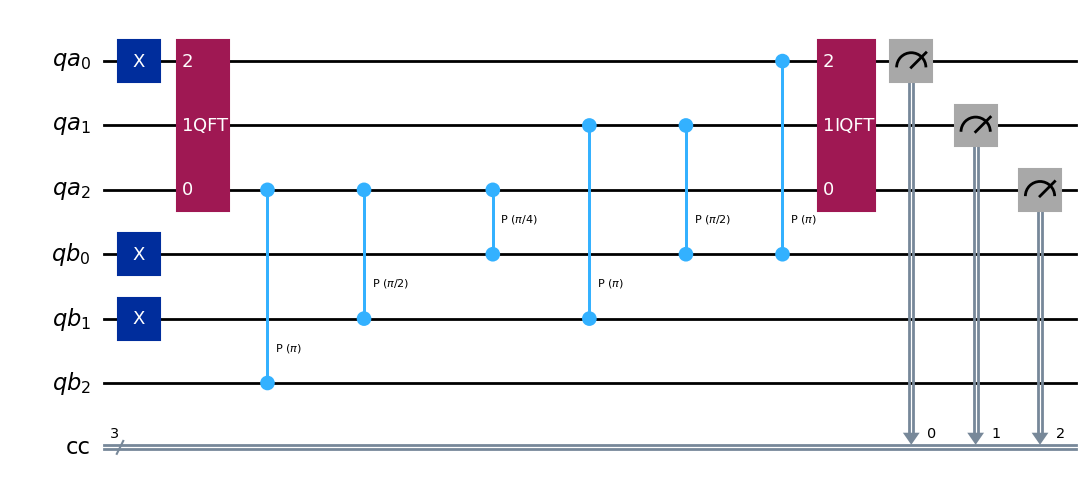

In [9]:
qc.draw(output="mpl")

<div id="header"><p style="color:#2ea44f; text-align:left; font-weight:bold; font-family:verdana; font-size:14px;">Versions</p></div>

In [10]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit


python version:  3.9.21
qiskit==1.4.1
qiskit-aer==0.17.0
qiskit-ibm-runtime==0.36.1


<div id="references"><p style="color:#2ea44f; text-align:left; font-weight:bold; font-family:verdana; font-size:14px;">References</p></div>

[1] https://www.digitalocean.com/community/tutorials/relu-function-in-python

[2] https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python

[3] https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.CPhaseGate